<a href="https://colab.research.google.com/github/kirankumarcode/Driver-Drowsiness-Detection-System-using-Arduino-/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
os.makedirs('outputs', exist_ok=True)

In [54]:
import os

base_path = '/content/drive/MyDrive/ds_Talada_kiran_kumar'

os.makedirs(f'{base_path}/outputs', exist_ok=True)
os.makedirs(f'{base_path}/csv_files', exist_ok=True)

outputs_path = f'{base_path}/outputs'
csv_path = f'{base_path}/csv_files'

In [55]:
fear_greed_data = pd.read_csv("fear_greed_index.csv")

print("Fear & Greed Data:")
print(fear_greed_data.head())

Fear & Greed Data:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [56]:
trader_data = pd.read_csv("historical_data.csv")

print("Trader Data:")
print(trader_data.head())

Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         

In [57]:
fear_greed_data['date'] = pd.to_datetime(fear_greed_data['date'], errors='coerce')
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], errors='coerce')

In [58]:
trader_data['trade_date'] = trader_data['Timestamp IST'].dt.date
fear_greed_data['sentiment_date'] = fear_greed_data['date'].dt.date

In [59]:
trader_data = trader_data.rename(columns={
'Closed PnL': 'profit',
'Size USD': 'trade_size',
'Execution Price': 'execution_price'
})

In [60]:
combined_data = pd.merge(
trader_data,
fear_greed_data,
left_on='trade_date',
right_on='sentiment_date',
how='left'
)

In [61]:
print(f"Data merged successfully! Rows: {len(combined_data)}")
print("Unique sentiment classifications:", combined_data['classification'].unique())

Data merged successfully! Rows: 211224
Unique sentiment classifications: ['Greed' 'Extreme Greed' 'Fear' nan 'Extreme Fear' 'Neutral']


In [62]:
combined_data['trade_value_usd'] = combined_data['trade_size'] * combined_data['execution_price']

In [63]:
fear_data = combined_data[combined_data['classification'].str.contains('FEAR', case=False, na=False)]
greed_data = combined_data[combined_data['classification'].str.contains('GREED', case=False, na=False)]

In [64]:
print(f"Average profit during FEAR: ${fear_data['profit'].mean():.2f}")
print(f"Average profit during GREED: ${greed_data['profit'].mean():.2f}")
print(f"Number of trades during FEAR: {len(fear_data)}")
print(f"Number of trades during GREED: {len(greed_data)}")

Average profit during FEAR: $110.13
Average profit during GREED: $104.45
Number of trades during FEAR: 16195
Number of trades during GREED: 16913


In [65]:
print(f"Average trade size during FEAR: ${fear_data['trade_value_usd'].mean():.2f}")
print(f"Average trade size during GREED: ${greed_data['trade_value_usd'].mean():.2f}")

Average trade size during FEAR: $105164917.99
Average trade size during GREED: $91825555.65


In [66]:
fear_trade_size = combined_data[combined_data['classification'].str.upper() == 'FEAR']['trade_value_usd']
greed_trade_size = combined_data[combined_data['classification'].str.upper() == 'GREED']['trade_value_usd']

print(f"Average trade size during FEAR: ${fear_trade_size.mean():.2f}")
print(f"Average trade size during GREED: ${greed_trade_size.mean():.2f}")

Average trade size during FEAR: $109429966.78
Average trade size during GREED: $105003000.46


In [67]:
plt.figure(figsize=(10, 6))
profits_by_sentiment = combined_data.groupby('classification')['profit'].mean()

<Figure size 1000x600 with 0 Axes>

In [68]:
colors = [
'green' if 'GREED' in str(s).upper() else
'red' if 'FEAR' in str(s).upper() else
'gray'
for s in profits_by_sentiment.index
]

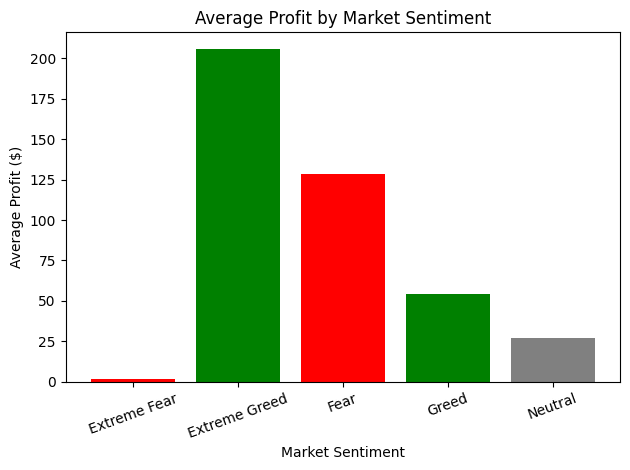

In [69]:
plt.bar(profits_by_sentiment.index, profits_by_sentiment.values, color=colors)
plt.title('Average Profit by Market Sentiment')
plt.ylabel('Average Profit ($)')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig('outputs/trade_count_by_sentiment.png', bbox_inches='tight')
plt.show()

In [70]:
plt.figure(figsize=(10, 6))

trade_size_by_sentiment = combined_data.groupby('classification')['trade_size'].mean().sort_index()
colors = [
'green' if 'GREED' in s else
'red' if 'FEAR' in s else
'gray'
for s in trade_size_by_sentiment.index
]

<Figure size 1000x600 with 0 Axes>

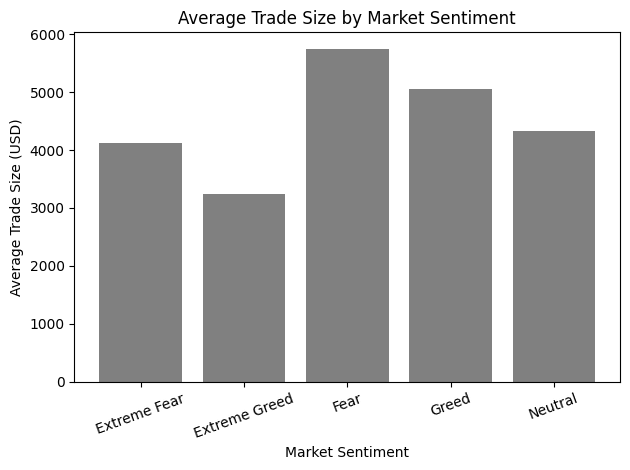

In [71]:
plt.bar(trade_size_by_sentiment.index, trade_size_by_sentiment.values, color=colors)
plt.title('Average Trade Size by Market Sentiment')
plt.ylabel('Average Trade Size (USD)')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig('outputs/trade_count_by_sentiment.png', bbox_inches='tight')
plt.show()

In [72]:
combined_data['is_profitable'] = combined_data['profit'] > 0
win_rates = combined_data.groupby('classification')['is_profitable'].mean().sort_index() * 100
colors = [
'green' if 'GREED' in s.upper() else
'red' if 'FEAR' in s.upper() else
'gray'
for s in win_rates.index
]

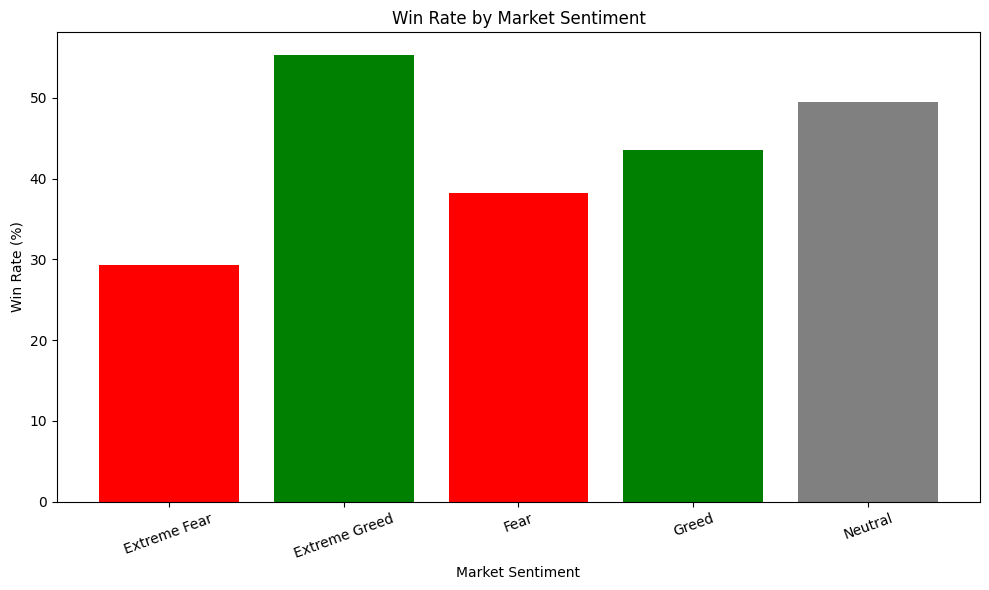

In [73]:
plt.figure(figsize=(10, 6))
plt.bar(win_rates.index, win_rates.values, color=colors)
plt.title('Win Rate by Market Sentiment')
plt.ylabel('Win Rate (%)')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig('outputs/trade_count_by_sentiment.png', bbox_inches='tight')
plt.show()

In [74]:
import os
os.makedirs('csv_files', exist_ok=True)
combined_data.to_csv('csv_files/combined_trader_sentiment_data_kk.csv', index=False)